# Lektion 7 - Beispiel 2

Import von Python-Bibliotheken und notwendiger Code für diverse Funktionen

In [39]:
## imports
import math
import pandas as pd
from IPython.display import HTML, display


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Code ein-/ausblenden"></form>
    '''
    display(HTML(toggle_code_js_html))


toggle_code()

# Aufgabentext

In einer deutschen Großstadt soll die durchschnittliche Kaltmiete pro Quadratmeter festgelegt werden. Es sei angenommen, dass das Merkmal X "Kaltmiete pro Quadratmeter" in Euro in der Grundgesamtheit normalverteilt ist. Frühere Untersuchungen haben ergeben, dass die Standardabweichung dieses Merkmals in der Grundgesamtheit 1,50 € je m2 ist. Eine Stichprobe im Umfang von 3000 ergibt einen
Stichprobenmittelwert von 12,60 € je m2. Die Konfidenzwahrscheinlichkeit wird auf 99% festgelegt. 

Bestimmen Sie das entsprechende Konfidenzintervall und stellen Sie das Ergebnis grafisch dar.

# Lösung

**1. Festlegung der Konfidenzwahrscheinlichkeit 1 - $\alpha$**

Die Konfidenzwahrscheinlichkeit beträgt 1 - $\alpha$ = 0.99, d.h. $\alpha$ = 0.01

**2. Bestimmung des z-Werts**

Der z-Wert für eine Konfidenzwahrscheinlichkeit von 99% beträgt 2,576.

In [1]:
import math
from scipy.stats import t
from scipy.stats import norm

In [12]:
# alpha=0.01, 2-seitig
z_value = norm.ppf(1 - (0.01 / 2))
print(z_value.round(3))

2.576


**3. Berechnung des Stichprobenmittelwerts $\bar{x}$ und der Stichprobenstandardabweichung s**

Der Stichprobenmittelwert beträgt laut Angabe 12,60 Euro/m2.

In [13]:
x_mean = 12.6
print(x_mean)

12.6


Die Standardabweichung in der Grundgesamtheit beträgt laut Angabe 1,50 Euro/m2.

In [14]:
sigma = 1.5
print(sigma)

1.5


**4. Berechnung der Standardabweichung des Stichprobenmittelwerts ${\sigma}_\bar{x} = \frac{\sigma}{\sqrt{n}}$**

In [15]:
standard_error = sigma / math.sqrt(3000)
print(standard_error)

0.027386127875258303


**5. Berechnung des Stichprobenfehlers $\delta = z_{1-\alpha} \sigma_\bar{x}$**

In [16]:
sample_error = t_value * standard_error
print(sample_error)

0.07058691430473146


**6. Angabe des Konfidenzintervalls $KI = [\bar{x} - z_{1-\alpha} \sigma_\bar{x} ;  \bar{x} + z_{1-\alpha} \sigma_\bar{x}] $**

In [17]:
lower_bound = x_mean - sample_error
upper_bound = x_mean + sample_error
print(lower_bound.round(2), upper_bound.round(2))

12.53 12.67


# Grafik

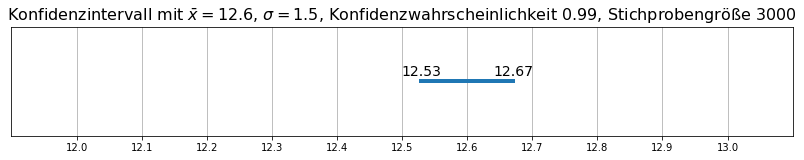

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline


def make_plot(konfp=0.99, sigma=1.5, n=3000):

    loc = 12.6
    
    alpha = 1 - konfp
    z_value = norm.ppf(1 - alpha / 2)
    standard_error = sigma / math.sqrt(n)
    
    lower_bound = loc - z_value * standard_error
    upper_bound = loc + z_value * standard_error
    
    x_values = np.linspace(lower_bound, upper_bound, 100)
    y_values = [1 for i in x_values]

    fig, ax = plt.subplots(figsize=(14, 2))
    ax.plot(x_values, y_values, linewidth=4)

    ## x-Achse
    ##
    plt.xlim(11.9, 13.1)
    ax.set_xticks(np.arange(12, 13.1, 0.1))

    ## y-Achse
    ##
    plt.ylim(0.9, 1.1)
    ax.set_yticks([])
    ax.set_yticklabels([])
    #ax.set_ylabel('$P(x)$', size=14)

    ## Sonstiges
    ##
    ax.set_title(r'Konfidenzintervall mit $\bar{x}=12.6$,' 
                 + r' $\sigma=${}, Konfidenzwahrscheinlichkeit {}, Stichprobengröße {}'.format(sigma, konfp, n), 
                 size=16)
    ax.grid(True, axis='x')

    ## Text für Untergrenze
    plt.annotate(
        '{:.2f}'.format(lower_bound),
        xy=(lower_bound, 1.01),
        ha='center',
        size=14
    )
    
    ## Text für Obergrenze
    plt.annotate(
        '{:.2f}'.format(upper_bound),
        xy=(upper_bound, 1.01),
        ha='center',
        size=14
    )

    plt.show()

make_plot()
toggle_code()